# Analisis exploratorio de datos con graficas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Podemos empezar a analizar los datos con ayuda de graficos, en este caso, usando histogramas, los cuales vimos como crearlos en la introducción a matplotlib

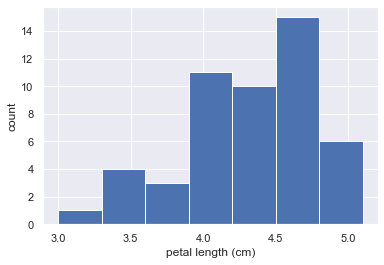

In [5]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

sns.set()
ax = plt.hist(versicolor_petal_length, bins = int(np.sqrt(len(versicolor_petal_length))))
# el numero recomendado para los bloques del histograma es la raiz del numero total de datos
# sacando la parte entera

ax = plt.xlabel('petal length (cm)')
ax = plt.ylabel('count')

plt.show()

## Grafico de panal 

Este tipo de grafico nos imprime todos los datos a diferencia del histograma, por lo que en ocasiones resulta mas conveniente

In [6]:
df_swing = pd.read_csv('2008_swing_states.txt')

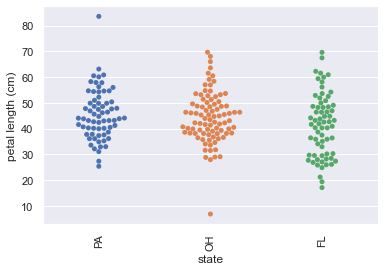

In [7]:
sns.set()
fig, ax = plt.subplots()
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing) 

### Label the axes
_ = ax.set_xticklabels(df_swing['state'].unique(), rotation=90)

_ = plt.ylabel('petal length (cm)')

plt.show()

## Funcion de distribucion empirica

Construiremos esta distribucion paso a paso

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

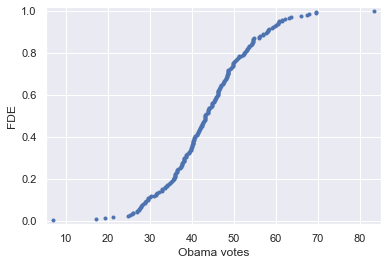

In [9]:
x_lab, y_lab = ecdf(df_swing['dem_share'])

plt.plot(x_lab,y_lab, marker='.', linestyle='none')
    
plt.ylabel('FDE')
plt.xlabel('Obama votes')
    
plt.margins(0.02)
    
plt.show()

## Estadistica descriptiva

Con numpy, podemos calcular cosas como los percentiles, media y mediana

### Percentiles

In [10]:
# calculamos los percentiles 25, 50 y 75, donde el percentil 50 es la mediana de los datos
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

Podemos indicar donde se encuentran los percentiles de la siguiente manera

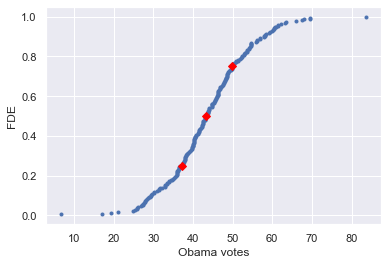

In [11]:
# percentiles que queremos
percentiles = np.array([25, 50, 75])

# calculamos los percentiles de la columna que queremos
vals_percent = np.percentile(df_swing['dem_share'], percentiles)

x_lab, y_lab = ecdf(df_swing['dem_share'])

_ = plt.plot(x_lab,y_lab, marker='.', linestyle='none')
    
_ = plt.ylabel('FDE')
_ = plt.xlabel('Obama votes')
    
_ = plt.plot(vals_percent, percentiles/100,linestyle='none', color='red', marker='D')
    
plt.show()

### Varianza y desviación estandar

Para calcular la varianza, podemos hacerlo con numpy

In [12]:
np.var(df_swing['dem_share'])

114.24649492735986

Para calcular la desviación estandar, lo hacemos de la siguiente manera

In [13]:
np.std(df_swing['dem_share'])

10.68861520157592

### Covarianza y coeficiente de correlacion de Pearson

Podemos calcular la matriz de la covarianza usando numpy, del mismo modo que el coeficiente de correlacion

In [14]:
np.cov(df_swing['dem_votes'], df_swing['rep_votes'])

array([[7.90553527e+09, 4.44251518e+09],
       [4.44251518e+09, 3.15943622e+09]])

En el arreglo anterior, la antidiagonal 'represental' la covarianza de las variables, mientras que la diagonal representa la varianza de ambas variables

Para calcular el coeficiente de correlacion lo haremos de la siguiente manera

In [15]:
print(np.corrcoef(df_swing['dem_votes'], df_swing['rep_votes']))
print('el coef de corr es:', np.corrcoef(df_swing['dem_votes'], df_swing['rep_votes'])[0,1])

[[1.         0.88891142]
 [0.88891142 1.        ]]
el coef de corr es: 0.8889114162385441


## Simulaciones y números pseudoaleatorios

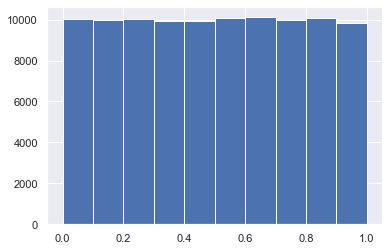

In [16]:
sns.set()
# fijamos la semilla
np.random.seed(42)

# creamos un arreglo vacio de 100000 entradas
random_numbers = np.empty(100000)

# simulamos 100000 numeros entre cero y uno
for i in range(0,100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


### Numeros con distribucion Bernoulli

Crearemos un funcion que nos simulará n v.a. Bernoulli con parámetro p y nos devolverá el numero de exitos que obtuvimos en los n intentos

In [17]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(0,n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success = n_success + 1

    return n_success

Ahora queremos visualizar la cantidad de exitos obtenidos en 1000 simulaciones de v.a. Bernoulli(0.05) 

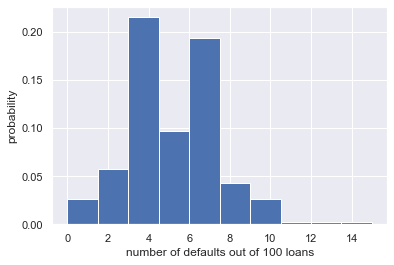

In [18]:
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
    
# con el parametro density hacemos que el eje y nos indique las probabilidades
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

El ejercicio anterior se puede interpretar como un banco que hace prestamos hipotecarios y se sabe que la probabilidad de que el prestamo no se pague es de 0.05. Si las tasas de interes son tales que el banco perderá dinero si 10 o mas prestamos no son complidos a tiempo, cual es la probabilidad de que el banco pierda dinero?

Como arriba ya tenemos hechas las simulaciones, solo queda ver cuantos casos fueron favorables y dividirlo entre los casos totales, en este caso, serán los numeros de simulaciones que hicimos (1000).

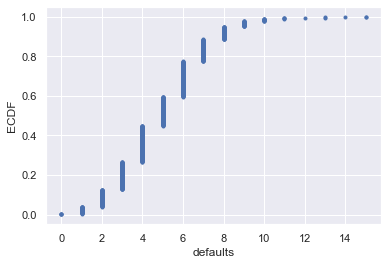

Probability of losing money = 0.022


In [19]:
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('defaults')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Numeros con distribucion Binomial

Simularemos numeros con distribucion binomial(n,p) de la siguiente manera

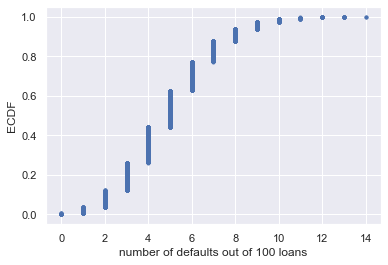

In [20]:
np.random.seed(42)

# simulamos 10000 v.a. con dist binomial(100,0.05)
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# calculamos la densidad empirica
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Podemos sacar el histograma de la función de densidad, de la siguiente manera

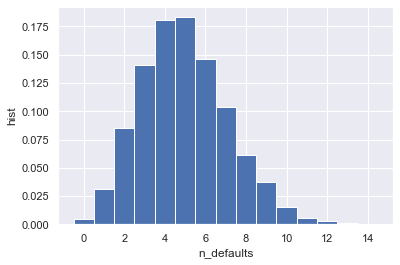

In [21]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
plt.xlabel('n_defaults')
plt.ylabel('hist')

# Show the plot
plt.show()

### Proceso Poisson y densidad Poisson

Sabemos que un evento ocurre en promedio 251/115 veces (i.e. se distribuye Poisson(251/115)), queremos ver cual es la probabilidad de que la va tome un valor mayor o igual a 7.

In [22]:
# simulamos 10000 v.a. poisson con media 251/115
n_nohitters = np.random.poisson(251/115, 10000)

# queremos ver cuantos de estos eventos resultaron mayor o igual a 7
n_large = np.sum(n_nohitters >= 7)

# Calculamos la probabilidad dividiendo casos favorables entre casos totales
p_large = n_large/10000

# Print the result
print('Probability of event:', p_large)

# el resultado se aproxima a 0.007

Probability of event: 0.0091


### Distribución Normal

In [28]:
michelson = pd.read_csv('michelson_speed_of_light.txt')

In [29]:
michelson_speed_of_light = michelson['velocity of light in air (km/s)']

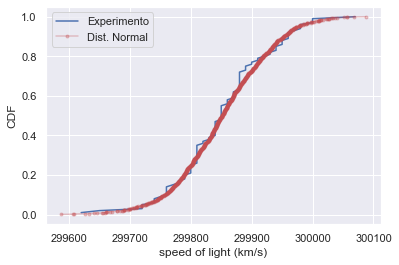

In [43]:
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)

samples = np.random.normal(mean, std, size=1000)

x, y = ecdf(michelson_speed_of_light)
x_teo, y_teo = ecdf(samples)

_ = plt.plot(x,y, label='Experimento')
_ = plt.plot(x_teo, y_teo, marker='.', color='r', alpha=0.3, label='Dist. Normal')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
_ = plt.legend()
plt.show()

Algunos histogramas de como luce la funcion de densidad con distintos parametros

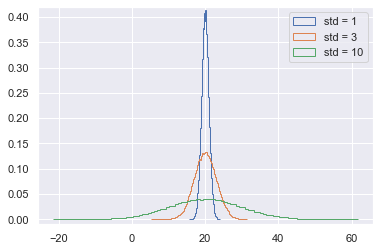

In [49]:
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

# Make histograms
_ = plt.hist(samples_std1, density=True, histtype='step', bins=100)
_ = plt.hist(samples_std3, density=True, histtype='step', bins=100)
_ = plt.hist(samples_std10, density=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

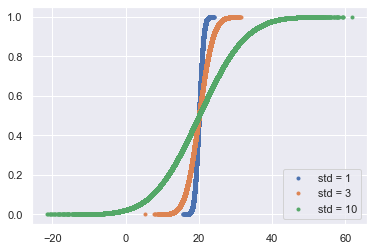

In [50]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Distribución exponencial

In [51]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Podemos simular dos eventos, suponiendo que el primero ocurre en promedio 764 veces y el segundo 715 con una distribucion exponencial en un periodo de tiempo dado. Queremos saber la probabilidad de que ambos eventos ocurran uno después del otro, para esto, graficaremos la densidad de la suma

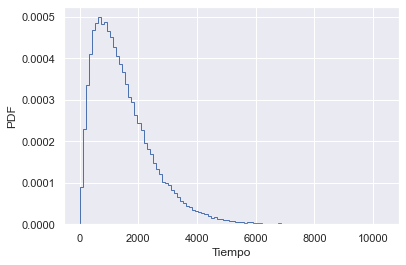

In [53]:
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel('Tiempo')
plt.ylabel('PDF')

# Show the plot
plt.show()